# **AI TECH INSTITUTE** · *Building Your First Synthetic Dataset*
### From Zero to Real Australian Housing Data
**Instructor:** Amir Charkhi  |  **Goal:** Learn to create realistic datasets for analysis

> "Why synthetic data? Because real data is messy, private, and sometimes unavailable. But we still need to learn!"


## 🎯 Today's Mission
Build a complete Australian housing dataset from scratch. No magic, just understanding every single line.

**What you'll learn:**
- How to think about data structure
- Using NumPy's random functions wisely
- Building DataFrames step-by-step
- Making data realistic (not just random!)

## Part 1: The Simplest Dataset Ever
Let's start with 5 houses. Just 5. We'll build up from here.

In [109]:
# Import what we need (and understand why)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ALWAYS set a seed - this makes your random numbers repeatable!
# Think of it as a recipe - same seed = same "random" results
np.random.seed(42)

print("Libraries loaded! Let's build some data 🏗️")

Libraries loaded! Let's build some data 🏗️


In [2]:
# METHOD 1: The Manual Way (Good for understanding)
# Let's create 5 houses manually first

simple_houses = pd.DataFrame({
    'house_id': [1, 2, 3, 4, 5],
    'city': ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'],
    'bedrooms': [3, 2, 4, 3, 2],
    'price': [1200000, 950000, 750000, 650000, 600000]
})

print("Our first dataset:")
print(simple_houses)
print("\n✅ Success! But typing 5000 houses would take forever...")

Our first dataset:
   house_id       city  bedrooms    price
0         1     Sydney         3  1200000
1         2  Melbourne         2   950000
2         3   Brisbane         4   750000
3         4      Perth         3   650000
4         5   Adelaide         2   600000

✅ Success! But typing 5000 houses would take forever...


## Part 2: Understanding Random Choices
The key to synthetic data is `np.random.choice()` - let's master it!

In [41]:
# Let's understand np.random.choice step by step

# 1. Simple random choice
cities = ['Sydney', 'Melbourne', 'Brisbane']
random_city = np.random.choice(cities)
print(f"Random city: {random_city}")

# 2. Multiple random choices
five_cities = np.random.choice(cities, size=5)
print(f"\n5 random cities: {five_cities}")

# 3. WITH PROBABILITIES (This is the secret sauce!)
# Sydney appears more because more people live there
realistic_cities = np.random.choice(
    cities, 
    size=10, 
    p=[0.5, 0.3, 0.2]  # 50% Sydney, 30% Melbourne, 20% Brisbane
)
print(f"\n10 realistic cities: {realistic_cities}")
print(f"Sydney appeared {sum(realistic_cities == 'Sydney')} times (should be ~5)")

Random city: Sydney

5 random cities: ['Melbourne' 'Brisbane' 'Sydney' 'Brisbane' 'Sydney']

10 realistic cities: ['Melbourne' 'Melbourne' 'Sydney' 'Sydney' 'Sydney' 'Sydney' 'Sydney'
 'Sydney' 'Brisbane' 'Melbourne']
Sydney appeared 6 times (should be ~5)


In [103]:
# 3. WITH PROBABILITIES (This is the secret sauce!)
# checking the frequency of Sydney appearance equals 5
sydney = []
for i in range(1,1001):
    realistic_cities = np.random.choice(
        cities, size=10, p=[0.5, 0.3, 0.2]) # 50% Sydney, 30% Melbourne, 20% Brisbane
    sydney.append(sum(realistic_cities=='Sydney'))
    #print(f"\n10 realistic cities: {realistic_cities}")
    #print(f"Sydney appeared {sum(realistic_cities == 'Sydney')} times (should be ~5)")

print(f"\nFrequency of Sydney appearance equals 5: {sydney.count(5)}")


Frequency of Sydney appearance equals 5: 223


In [104]:
# EXERCISE: Try it yourself!
# Create 20 property types where:
# - 60% are Houses
# - 30% are Apartments  
# - 10% are Townhouses

property_types = ['House', 'Apartment', 'Townhouse']

# YOUR CODE HERE:
my_properties = np.random.choice(
    property_types,
    size = 20,
    p=[0.6,0.3,0.1]
)
my_properties
# Uncomment to see solution:
#my_properties = np.random.choice(property_types, size=20, p=[0.6, 0.3, 0.1])
#print(my_properties)

array(['House', 'House', 'Townhouse', 'House', 'Apartment', 'House',
       'Townhouse', 'House', 'Apartment', 'House', 'Townhouse',
       'Townhouse', 'House', 'Townhouse', 'House', 'House', 'Apartment',
       'Townhouse', 'Apartment', 'Apartment'], dtype='<U9')

## Part 3: Building Our First Real Dataset (100 Houses)
Now let's combine everything and build something useful!

In [105]:
# Reset our random seed for consistency
np.random.seed(42)

# Let's build 100 houses step by step
n_houses = 100

# Step 1: Define our options and their probabilities
cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']
city_probabilities = [0.3, 0.25, 0.2, 0.15, 0.1]  # Based on real population!

property_types = ['House', 'Apartment', 'Townhouse']
type_probabilities = [0.5, 0.35, 0.15]

# Step 2: Generate the data
housing_data_v1 = pd.DataFrame({
    'property_id': range(1, n_houses + 1),  # IDs from 1 to 100
    'city': np.random.choice(cities, n_houses, p=city_probabilities),
    'property_type': np.random.choice(property_types, n_houses, p=type_probabilities),
    'bedrooms': np.random.choice([1, 2, 3, 4], n_houses, p=[0.1, 0.3, 0.4, 0.2])
})

print("First 10 houses:")
print(housing_data_v1.head(10))
print(f"\nDataset shape: {housing_data_v1.shape}")
print("\n✅ We have 100 houses! But no prices yet...")

First 10 houses:
   property_id       city property_type  bedrooms
0            1  Melbourne         House         3
1            2   Adelaide     Apartment         1
2            3   Brisbane         House         2
3            4   Brisbane     Apartment         4
4            5     Sydney     Townhouse         3
5            6     Sydney         House         1
6            7     Sydney         House         2
7            8      Perth     Apartment         3
8            9   Brisbane         House         1
9           10   Brisbane         House         2

Dataset shape: (100, 4)

✅ We have 100 houses! But no prices yet...


In [14]:
housing_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    100 non-null    int64 
 1   city           100 non-null    object
 2   property_type  100 non-null    object
 3   bedrooms       100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [17]:
# Let's check if our probabilities worked
print("City distribution:")
print(housing_data_v1['city'].value_counts(normalize=True).round(2))
print("\nProperty type distribution:")
print(housing_data_v1['property_type'].value_counts(normalize=True).round(2))
print("\n✅ Close to our target probabilities!")

City distribution:
city
Sydney       0.34
Melbourne    0.25
Brisbane     0.17
Perth        0.15
Adelaide     0.09
Name: proportion, dtype: float64

Property type distribution:
property_type
House        0.49
Apartment    0.33
Townhouse    0.18
Name: proportion, dtype: float64

✅ Close to our target probabilities!


## Part 4: Adding Realistic Prices
Random prices are boring. Let's make them REALISTIC based on city and bedrooms!

In [106]:
# Method 1: Simple base price per city
base_prices = {
    'Sydney': 1200000,
    'Melbourne': 950000,
    'Brisbane': 750000,
    'Perth': 650000,
    'Adelaide': 600000
}

# Map city to base price
housing_data_v1['base_price'] = housing_data_v1['city'].map(base_prices)

# Adjust for bedrooms (each bedroom adds 15% to price)
housing_data_v1['price'] = housing_data_v1['base_price'] * (1 + 0.15 * housing_data_v1['bedrooms'])

# Add some random variation (+/- 20%)
random_variation = np.random.uniform(0.8, 1.2, n_houses)
housing_data_v1['price'] = housing_data_v1['price'] * random_variation

# Round to nearest $1000
housing_data_v1['price'] = (housing_data_v1['price'] / 1000).round() * 1000

print("Sample of our data with prices:")
print(housing_data_v1[['city', 'bedrooms', 'price']].head(10))
print(f"\nPrice range: ${housing_data_v1['price'].min():,.0f} to ${housing_data_v1['price'].max():,.0f}")

Sample of our data with prices:
        city  bedrooms      price
0  Melbourne         3  1130000.0
1   Adelaide         1   699000.0
2   Brisbane         2   991000.0
3   Brisbane         4  1266000.0
4     Sydney         3  1897000.0
5     Sydney         1  1643000.0
6     Sydney         2  1570000.0
7      Perth         3   876000.0
8   Brisbane         1   964000.0
9   Brisbane         2   886000.0

Price range: $638,000 to $2,259,000


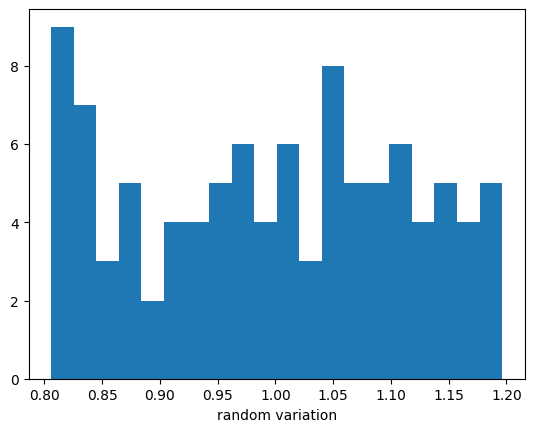

In [111]:
plt.hist(random_variation, bins = 20)
plt.xlabel('random variation')
plt.show()

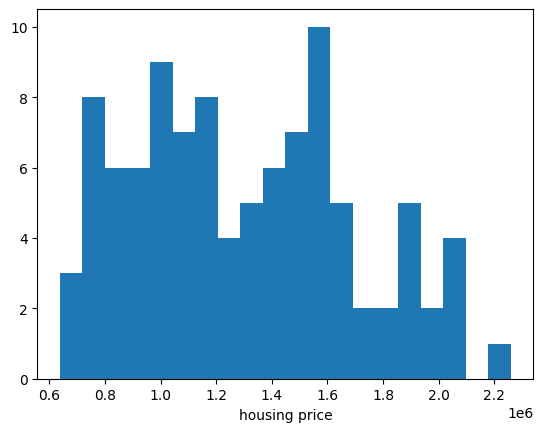

In [112]:
plt.hist(housing_data_v1['price'], bins = 20)
plt.xlabel('housing price')
plt.show()

## Part 5: Understanding Different Random Distributions
Not everything should be uniformly random! Let's learn about distributions.

Uniform (all equally likely):
[72.8 92.3 76.2 59.2 19.2 66.7 62.3 60.2 49.  52.9]


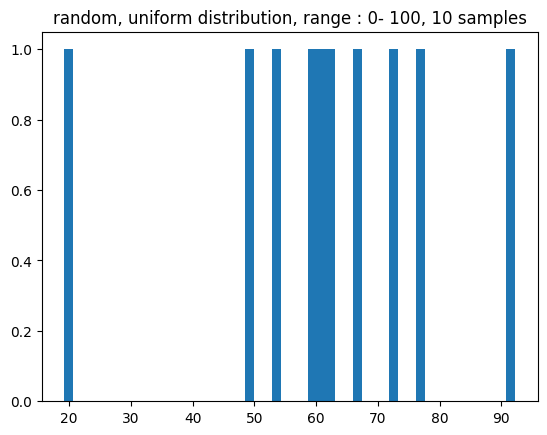

In [143]:
# Different types of random numbers for different purposes

# 1. UNIFORM: Equal chance for any value (good for IDs)
uniform_numbers = np.random.uniform(low=0, high=100, size=10)
print("Uniform (all equally likely):")
print(uniform_numbers.round(1))

plt.hist(uniform_numbers, bins=50)
plt.title('random, uniform distribution, range : 0- 100, 10 samples')
plt.show()

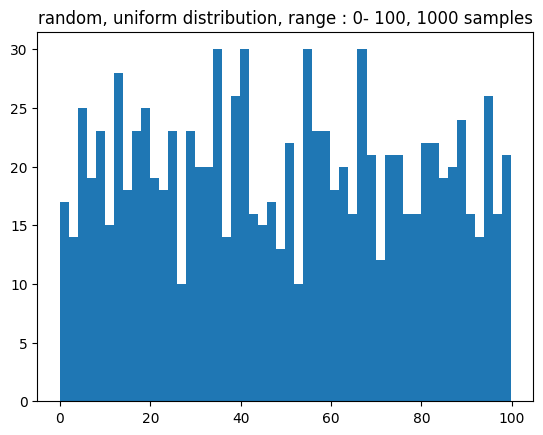

In [140]:
# 1. UNIFORM: Equal chance for any value (good for IDs)
uniform_numbers = np.random.uniform(low=0, high=100, size=1000)
#print("Uniform (all equally likely):")
#print(uniform_numbers.round(1))

plt.hist(uniform_numbers, bins=50)
plt.title('random, uniform distribution, range : 0- 100, 1000 samples')
plt.show()


Normal distribution (bell curve):
[1982 2002 2001 1957 2035 2020 1987 1972 2001 1996]

Min year = 1957, max year = 2035


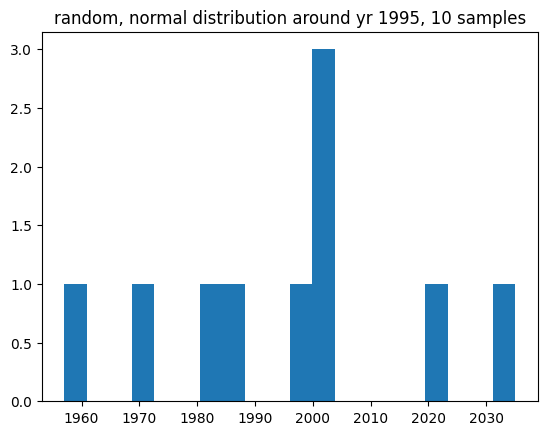

In [142]:
# 2. NORMAL: Bell curve (good for human characteristics)
# Example: Year built - most houses built around 1995, fewer very old or very new
years_built = np.random.normal(loc=1995, scale=20, size=10).astype(int)
print("\nNormal distribution (bell curve):")
print(years_built)
print(f"\nMin year = {years_built.min()}, max year = {years_built.max()}")

plt.hist(years_built, bins=20)
plt.title("random, normal distribution around yr 1995, 10 samples")
plt.show()


Min year = 1935, max year = 2073


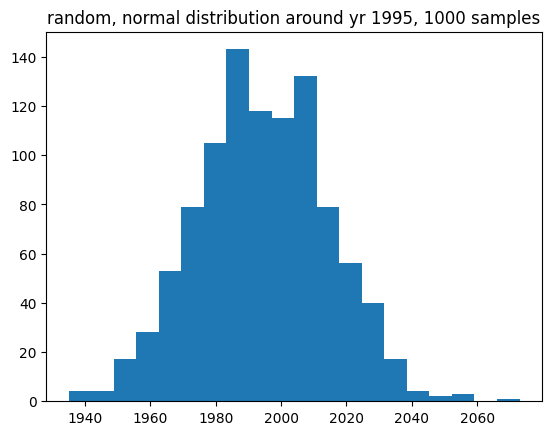

In [139]:
# Example: Year built - most houses built around 1995, fewer very old or very new
years_built = np.random.normal(loc=1995, scale=20, size=1000).astype(int)
#print("\nNormal distribution (bell curve):")
#print(years_built)
print(f"\nMin year = {years_built.min()}, max year = {years_built.max()}")

plt.hist(years_built, bins=20)
plt.title("random, normal distribution around yr 1995, 1000 samples")
plt.show()


Exponential (many small, few large):
[ 6.1 11.   3.3 24.5  3.1  1.3  8.6 16.1  8.6  4.9]


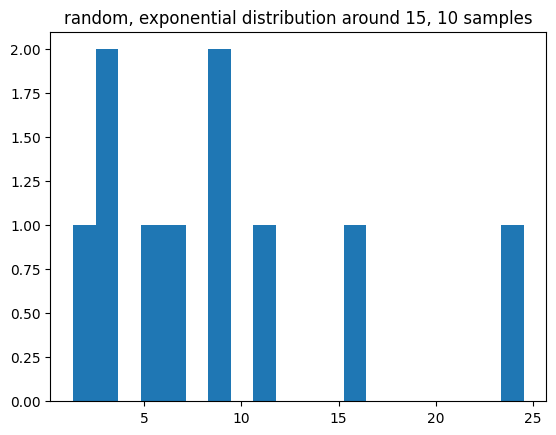

In [144]:
# 3. EXPONENTIAL: Many small values, few large (good for distances)
# Example: Distance from CBD - many properties close, fewer far away
distances = np.random.exponential(scale=15, size=10)
print("\nExponential (many small, few large):")
print(distances.round(1))

plt.hist(distances, bins=20)
plt.title("random, exponential distribution around 15, 10 samples")
plt.show()

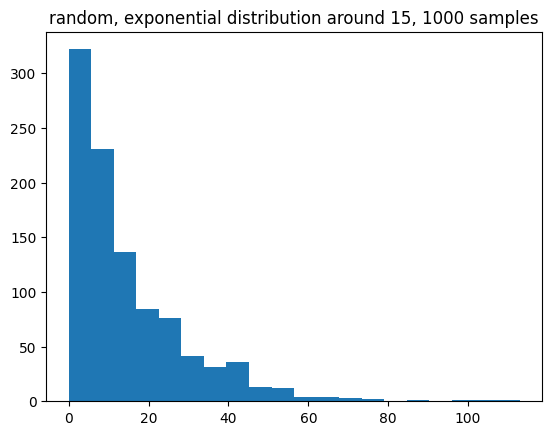

In [146]:
# 3. EXPONENTIAL: Many small values, few large (good for distances)
# Example: Distance from CBD - many properties close, fewer far away
distances = np.random.exponential(scale=15, size=1000)
#print("\nExponential (many small, few large):")
#print(distances.round(1))

plt.hist(distances, bins=20)
plt.title("random, exponential distribution around 15, 1000 samples")
plt.show()


Lognormal (skewed to right):
[414. 701. 963. 702. 502. 182. 403. 263. 306. 299.]


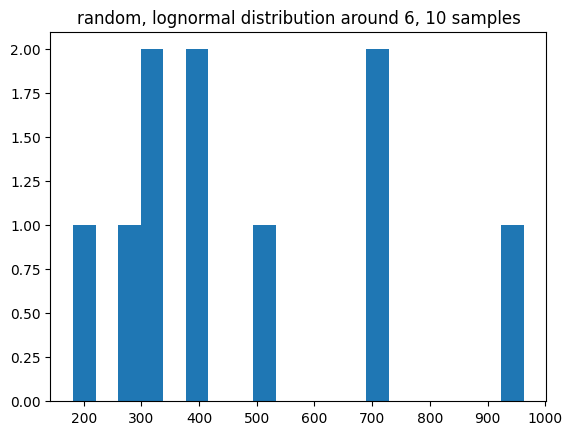

In [147]:
# 4. LOGNORMAL: Like normal but skewed (good for sizes, prices)
# Example: Land size - most properties moderate, some mansions
land_sizes = np.random.lognormal(mean=6, sigma=0.8, size=10)
print("\nLognormal (skewed to right):")
print(land_sizes.round(0))

plt.hist(land_sizes, bins=20)
plt.title("random, lognormal distribution around 6, 10 samples")
plt.show()

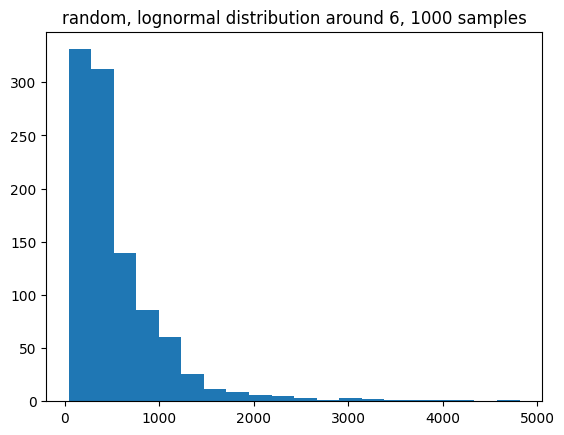

In [149]:
# 4. LOGNORMAL: Like normal but skewed (good for sizes, prices)
# Example: Land size - most properties moderate, some mansions
land_sizes = np.random.lognormal(mean=6, sigma=0.8, size=1000)
#print("\nLognormal (skewed to right):")
#print(land_sizes.round(0))

plt.hist(land_sizes, bins=20)
plt.title("random, lognormal distribution around 6, 1000 samples")
plt.show()

## Part 6: Building the Complete Dataset (5000 Houses)
Now let's build the full dataset with ALL features!

In [150]:
# The COMPLETE Australian Housing Dataset
# This is what your students showed, but explained step-by-step

np.random.seed(42)
n_properties = 5000

# Cities with realistic population distribution
cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'Hobart', 'Darwin', 'Canberra']
city_weights = [0.25, 0.22, 0.15, 0.12, 0.10, 0.06, 0.04, 0.06]

print("Building dataset...")

# Generate all features
housing_data = pd.DataFrame({
    # Identifiers
    'property_id': range(1, n_properties + 1),
    
    # Location
    'city': np.random.choice(cities, n_properties, p=city_weights),
    'suburb': ['Suburb_' + str(i % 50) for i in range(n_properties)],  # 50 suburbs cycling
    
    # Property characteristics
    'property_type': np.random.choice(
        ['House', 'Apartment', 'Townhouse', 'Villa'], 
        n_properties, 
        p=[0.45, 0.35, 0.15, 0.05]
    ),
    'bedrooms': np.random.choice([1, 2, 3, 4, 5], n_properties, p=[0.1, 0.25, 0.35, 0.25, 0.05]),
    'bathrooms': np.random.choice([1, 2, 3], n_properties, p=[0.4, 0.45, 0.15]),
    'car_spaces': np.random.choice([0, 1, 2, 3], n_properties, p=[0.15, 0.35, 0.40, 0.10]),
    
    # Sizes (using lognormal for realistic distribution)
    'land_size': np.random.lognormal(6, 0.8, n_properties),
    'building_size': np.random.lognormal(5, 0.6, n_properties),
    
    # Age (normal distribution around 1995)
    'year_built': np.random.normal(1995, 20, n_properties).astype(int).clip(1950, 2024),
    
    # Distances (exponential - most properties close to amenities)
    'distance_cbd': np.random.exponential(15, n_properties),
    'distance_school': np.random.exponential(2, n_properties),
    'distance_station': np.random.exponential(3, n_properties),
    
    # Crime rate (lower is better)
    'crime_rate': np.random.exponential(5, n_properties),
    
    # Sale dates (spread over 2024)
    'sale_date': pd.date_range(end='2024-12-31', periods=n_properties),
})

print("✅ Basic features created!")
print(f"Dataset shape: {housing_data.shape}")

Building dataset...
✅ Basic features created!
Dataset shape: (5000, 15)


In [151]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   property_id       5000 non-null   int64         
 1   city              5000 non-null   object        
 2   suburb            5000 non-null   object        
 3   property_type     5000 non-null   object        
 4   bedrooms          5000 non-null   int64         
 5   bathrooms         5000 non-null   int64         
 6   car_spaces        5000 non-null   int64         
 7   land_size         5000 non-null   float64       
 8   building_size     5000 non-null   float64       
 9   year_built        5000 non-null   int64         
 10  distance_cbd      5000 non-null   float64       
 11  distance_school   5000 non-null   float64       
 12  distance_station  5000 non-null   float64       
 13  crime_rate        5000 non-null   float64       
 14  sale_date         5000 n

In [152]:
# Now add REALISTIC prices based on multiple factors
base_price = {
    'Sydney': 1200000, 'Melbourne': 950000, 'Brisbane': 750000, 'Perth': 650000,
    'Adelaide': 600000, 'Hobart': 550000, 'Darwin': 600000, 'Canberra': 850000
}

# This is the MAGIC FORMULA that makes prices realistic!
housing_data['price'] = housing_data.apply(lambda row: 
    base_price[row['city']] *                    # Start with city base
    (1 + 0.15 * row['bedrooms']) *              # More bedrooms = higher price
    (1 + 0.1 * row['bathrooms']) *              # More bathrooms = higher price
    (1 - 0.01 * row['distance_cbd']) *          # Closer to CBD = higher price
    (1 + np.random.normal(0, 0.15)),            # Random variation +/- 15%
    axis=1
)

# Add derived features (these are calculated from other columns)
housing_data['price_per_sqm'] = housing_data['price'] / housing_data['building_size']
housing_data['age'] = 2024 - housing_data['year_built']
housing_data['quarter'] = housing_data['sale_date'].dt.quarter
housing_data['month'] = housing_data['sale_date'].dt.month

print("Sample of complete dataset:")
print(housing_data.head())
print(f"\nPrice statistics:")
print(housing_data['price'].describe())

Sample of complete dataset:
   property_id       city    suburb property_type  bedrooms  bathrooms  \
0            1  Melbourne  Suburb_0         House         3          2   
1            2   Canberra  Suburb_1     Apartment         2          2   
2            3      Perth  Suburb_2     Townhouse         2          2   
3            4   Brisbane  Suburb_3         House         3          1   
4            5     Sydney  Suburb_4     Townhouse         3          1   

   car_spaces   land_size  building_size  year_built  distance_cbd  \
0           2  563.487485      47.540102        1965      7.487102   
1           1  434.715657     199.567613        2008     41.373288   
2           1  238.044705      62.230882        2024     15.322877   
3           2  404.722241     159.342301        2005     27.254424   
4           1  227.805171     255.390690        2024     14.529193   

   distance_school  distance_station  crime_rate  sale_date         price  \
0         1.811689          1

## Part 7: Quick Data Validation
Always check if your synthetic data makes sense!

In [153]:
# Check 1: Do prices make sense by city?
print("Average price by city:")
print(housing_data.groupby('city')['price'].mean().sort_values(ascending=False).round(0))

print("\n" + "="*50)

# Check 2: Do bedrooms affect price?
print("\nAverage price by bedrooms:")
print(housing_data.groupby('bedrooms')['price'].mean().round(0))

print("\n" + "="*50)

# Check 3: Data types
print("\nData types:")
print(housing_data.dtypes)

print("\n✅ Data looks realistic and ready for analysis!")

Average price by city:
city
Sydney       1709427.0
Melbourne    1353123.0
Canberra     1259475.0
Brisbane     1062834.0
Perth         956535.0
Adelaide      875677.0
Darwin        864603.0
Hobart        811218.0
Name: price, dtype: float64


Average price by bedrooms:
bedrooms
1    1000395.0
2    1137099.0
3    1249685.0
4    1392349.0
5    1576355.0
Name: price, dtype: float64


Data types:
property_id                  int64
city                        object
suburb                      object
property_type               object
bedrooms                     int64
bathrooms                    int64
car_spaces                   int64
land_size                  float64
building_size              float64
year_built                   int64
distance_cbd               float64
distance_school            float64
distance_station           float64
crime_rate                 float64
sale_date           datetime64[ns]
price                      float64
price_per_sqm              float64
age       

## 🎯 Exercise: Create Your Own Dataset
Now create a dataset for Australian car sales with:
- 1000 cars
- Brands: Toyota (30%), Mazda (20%), Ford (15%), BMW (10%), others
- Years: Normal distribution around 2018
- Prices: Based on brand and age
- Kilometeres: Exponential distribution

In [202]:
# YOUR SOLUTION HERE
# Hint: Follow the same pattern we used for housing!

np.random.seed(42)
n_cars = 1000

brands = ['Toyota','Mazda','Ford','BMW','Others']
brands_p = [0.3, 0.2, 0.15, 0.1, 0.25]

price_dict = {'Toyota': 45000,'Mazda':43000,'Ford':58000,'BMW':95000,'Others':35000}
random_variation = np.random.uniform(0.8, 1.2, n_cars)

car_data = pd.DataFrame({
    'car_id' : range(1,n_cars+1),
    'brands' : np.random.choice(brands, n_cars, p=brands_p),
    'year' : np.random.normal(2018, 3, n_cars).astype(int).clip(2012,2024),
    'annual_km' : np.random.exponential(12000, n_cars).round()
})

car_data['age']=2025-car_data['year']
car_data['kilometers']=(car_data['age']*car_data['annual_km']).clip(5000,300000)
car_data['base_price']=car_data['brands'].map(price_dict)

age_factor = 0.88**car_data['age']
km_factor = np.exp(-0.105*(car_data['kilometers']/10000))
car_data['price'] = (car_data['base_price']*random_variation*age_factor*km_factor).clip(lower=3000)

In [200]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_id      1000 non-null   int64  
 1   brands      1000 non-null   object 
 2   year        1000 non-null   int64  
 3   annual_km   1000 non-null   float64
 4   age         1000 non-null   int64  
 5   kilometers  1000 non-null   float64
 6   base_price  1000 non-null   int64  
 7   price       1000 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 62.6+ KB


In [194]:
car_data.describe()

,car_id,year,annual_km,age,kilometers,base_price,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2017.566000,11666.187000,7.434000,80708.811000,49542.000000,11846.060400
std,288.819436,2.812749,11830.694254,2.812749,76811.619318,17632.559177,9831.611531
min,1.000000,2012.000000,0.000000,1.000000,5000.000000,35000.000000,3000.000000
25%,250.750000,2016.000000,3317.000000,5.000000,21019.500000,35000.000000,4576.365590
50%,500.500000,2018.000000,8144.000000,7.000000,54288.000000,45000.000000,9126.420505
75%,750.250000,2020.000000,16053.000000,9.000000,120981.000000,58000.000000,15803.691892
max,1000.000000,2024.000000,92682.000000,13.000000,300000.000000,95000.000000,83103.119534


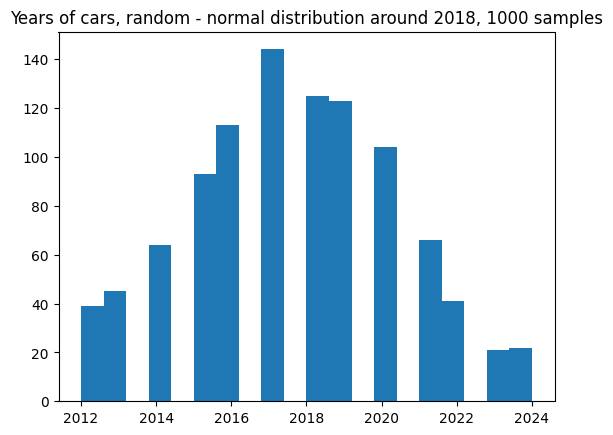

In [203]:
plt.hist(car_data['year'], bins=20)
plt.title("Years of cars, random - normal distribution around 2018, 1000 samples")
plt.show()

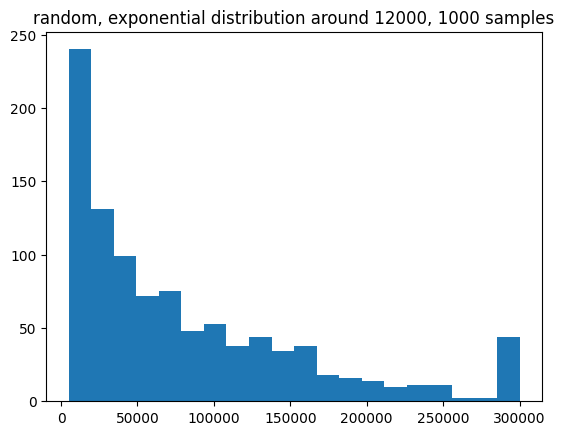

In [204]:
plt.hist(car_data['kilometers'], bins=20)
plt.title("random, exponential distribution around 12000, 1000 samples")
plt.show()

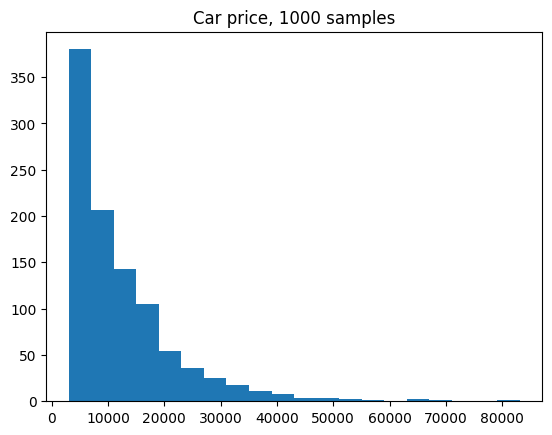

In [205]:
plt.hist(car_data['price'], bins=20)
plt.title("Car price, 1000 samples")
plt.show()

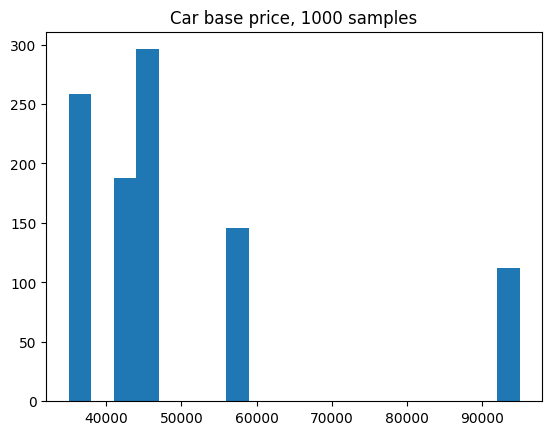

In [206]:
plt.hist(car_data['base_price'], bins=20)
plt.title("Car base price, 1000 samples")
plt.show()

## 📝 Key Takeaways

1. **Always set a seed** for reproducible "random" data
2. **Use probabilities** to make data realistic (not uniform)
3. **Different distributions** for different features:
   - Uniform: IDs
   - Normal: Ages, years
   - Exponential: Distances
   - Lognormal: Sizes, prices
4. **Base + adjustments** formula for realistic relationships
5. **Always validate** your synthetic data

### Next notebook: Basic Matplotlib - Understanding Axes and Figures!